In [1]:
%pwd

'C:\\Users\\matin\\Documents\\Data Analysis\\Module 10 (SQL_Alchemy) Challenge\\sqlalchemy-challenge\\Vaycay'

In [7]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [16]:
# Python SQL toolkit and Object Relational Mapper
from pathlib import Path
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [17]:
# create engine to hawaii.sqlite
db_path=Path("../Resources/hawaii.sqlite")
engine = create_engine(f"sqlite:///{db_path}")

In [18]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [20]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [22]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [23]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [24]:
# Find the most recent date in the data set.
#arrange dates in descending order then pull first
recent_date=session.query(func.max(Measurement.date)).first()
recent_date

('2017-08-23',)

Text(0, 0.5, 'Inches')

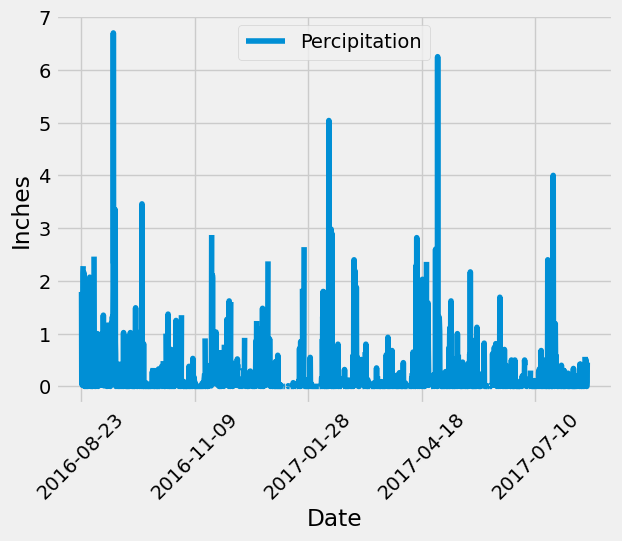

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_yr=dt.date(2017, 8, 23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
percip_scores=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_yr).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
percip_scores_df=pd.DataFrame(percip_scores, columns=['Date', 'Percipitation'])

# Sort the dataframe by date
percip_scores_df=percip_scores_df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
percip_scores_df.plot(x='Date', y='Percipitation', rot=45)
plt.xlabel("Date")
plt.ylabel("Inches")

In [27]:
# Use Pandas to calculate the summary statistics for the precipitation data
percip_scores_df.describe()

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [30]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station=="USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

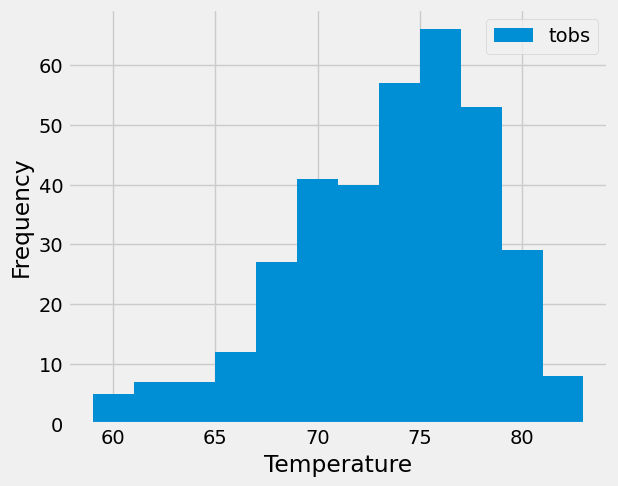

In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_rows=session.query(Measurement.tobs).filter(Measurement.station=="USC00519281").filter(Measurement.date >= last_yr).all()
most_rows_df=pd.DataFrame(most_rows, columns=['tobs'])
most_rows_df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")

# Close Session

In [33]:
# Close Session
session.close()